In [1]:
import openrtdynamics2.lang as dy
import openrtdynamics2.lang.ringbuffer as rb
import openrtdynamics2.py_execute as dyexe
from openrtdynamics2.ORTDtoNumpy import ORTDtoNumpy

import numpy as np
import math


In [2]:
@ORTDtoNumpy()
def ringbuffer_test(sinus_signal):
    # allocate the class SharedStates
    
    shared_ptr = rb.new_ringbuffer_float64(100)

    # example input signals
    index1       = dy.saturate( dy.counter() - 10, lower_limit=0 )
    index2       = dy.saturate( dy.counter() - 20, lower_limit=0 )

    # calls to the custom code
    rb.append_to_buffer(shared_ptr, sinus_signal)
    output1 = rb.read_from_absolute_index(shared_ptr, index1) # the input signal is delayed by 10 steps
    output2 = rb.read_from_absolute_index(shared_ptr, index2) # the input signal is delayed by 20 steps

    write_index = rb.get_current_absolute_write_index(shared_ptr)

    
    return output1, output2, index1, index2, write_index


sinus_signal = np.sin( np.linspace(0,math.pi*5, 100) )
output1, output2, index1, index2, write_index = ringbuffer_test( sinus_signal ) 

compiling system simulation (level 0)... 
determining the computation order...
building execution paths...
All dependencies are resolved.


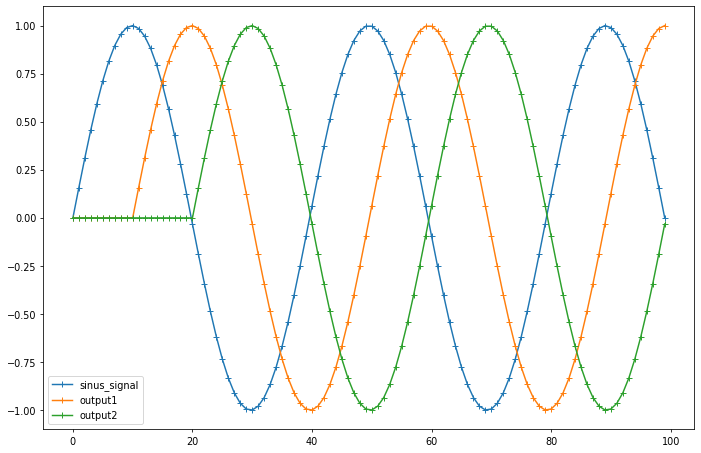

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8), dpi=70)
plt.plot( sinus_signal, '+-' )
plt.plot( output1, '+-' )
plt.plot( output2, '+-' )
plt.legend(['sinus_signal', 'output1', 'output2'])
plt.show()


In [4]:
# NBVAL_CHECK_OUTPUT
output1

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.1580014 ,  0.31203345,  0.45822652,  0.59290793,
        0.71269417,  0.81457595,  0.89599377,  0.95490224,  0.98982144,
        0.99987413,  0.98480775,  0.94500082,  0.88145336,  0.79576184,
        0.69007901,  0.56705986,  0.42979491,  0.28173256,  0.12659245,
       -0.03172793, -0.18925124, -0.34202014, -0.48619674, -0.61815899,
       -0.73459171, -0.83256985, -0.909632  , -0.96384216, -0.99383846,
       -0.99886734, -0.97880245, -0.93414786, -0.8660254 , -0.77614646,
       -0.666769  , -0.54064082, -0.40093054, -0.25114799, -0.09505604,
        0.06342392,  0.22031053,  0.37166246,  0.51367739,  0.64278761,
        0.75574957,  0.84972543,  0.92235429,  0.97181157,  0.99685478,
        0.99685478,  0.97181157,  0.92235429,  0.84972543,  0.75574957,
        0.64278761,  0.51367739,  0.37166246,  0.22031053,  0.06

In [5]:
# NBVAL_CHECK_OUTPUT
output2

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.1580014 ,  0.31203345,  0.45822652,  0.59290793,
        0.71269417,  0.81457595,  0.89599377,  0.95490224,  0.98982144,
        0.99987413,  0.98480775,  0.94500082,  0.88145336,  0.79576184,
        0.69007901,  0.56705986,  0.42979491,  0.28173256,  0.12659245,
       -0.03172793, -0.18925124, -0.34202014, -0.48619674, -0.61815899,
       -0.73459171, -0.83256985, -0.909632  , -0.96384216, -0.99383846,
       -0.99886734, -0.97880245, -0.93414786, -0.8660254 , -0.77614646,
       -0.666769  , -0.54064082, -0.40093054, -0.25114799, -0.09505604,
        0.06342392,  0.22031053,  0.37166246,  0.51367739,  0.64278761,
        0.75574957,  0.84972543,  0.92235429,  0.97181157,  0.99